In [16]:
from platform import python_version
import tensorflow
import keras
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [17]:
cameras = [
    ["CAM02009CCTV7.jpg", "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", "Port Matilda US-322 By-Pass Westbound",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", "Port Matilda I-99 Exit 61 Median",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg","Atherton and Valley Vista",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg","Atherton and Vairo",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg","Atherton and North Hills",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg","Atherton and Park",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg","Atherton and W.College",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg","Atherton and W.Beaver",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg","I-99/US-322 Interchange",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg","Benner Pike",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg","Grays Woods",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg","US-322 E/O PA-26",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg","I-99 at Exit 71 (Toftrees)",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg","Snowshoe I-80 Exit 147",41.022703,-77.933981]
    ]

In [18]:
camdf = pd.DataFrame(cameras,columns = ['ID','Description','Latitude','Longitude'])

In [19]:
camdf

,ID,Description,Latitude,Longitude
0,CAM02009CCTV7.jpg,I-80 Eastbound Exit 161 Bellefonte Interchange...,40.944571,-77.720918
1,CAM02001CCTV2.jpg,Port Matilda US-322 By-Pass Westbound,40.810961,-78.075259
2,CAM02010CCTV11.jpg,Port Matilda I-99 Exit 61 Median,40.803880,-78.063664
3,CAM02005CCTV9.jpg,Milesburg Interchange West I-80 Exit 158 Eastb...,40.955477,-77.773749
4,CAM02006CCTV10.jpg,Milesburg Interchange East I-80 Exit 158 Westb...,40.956061,-77.766277
5,CAM02028CCTV32.jpg,Atherton and Valley Vista,40.812073,-77.922500
6,CAM02037CCTV43.jpg,Atherton and Vairo,40.807936,-77.895204
7,CAM02038CCTV44.jpg,Atherton and North Hills,40.805031,-77.886886
8,CAM02039CCTV45.jpg,Atherton and Park,40.796522,-77.872549
9,CAM02040CCTV46.jpg,Atherton and W.College,40.791787,-77.864971


In [36]:
camdf.to_csv("PennDotCameras.csv")

I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)  Lat/Lon: ( 40.944571 , -77.720918 )


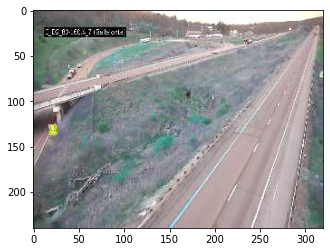

Port Matilda US-322 By-Pass Westbound  Lat/Lon: ( 40.810961 , -78.075259 )


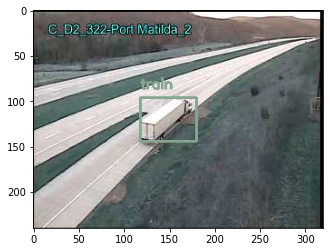

Port Matilda I-99 Exit 61 Median  Lat/Lon: ( 40.80388 , -78.063664 )


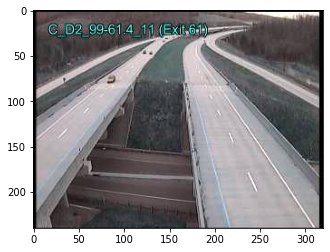

Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220  Lat/Lon: ( 40.955477 , -77.773749 )


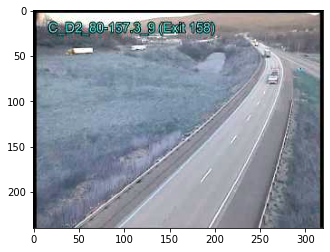

Milesburg Interchange East I-80 Exit 158 Westbound / PA-150  Lat/Lon: ( 40.956061 , -77.766277 )


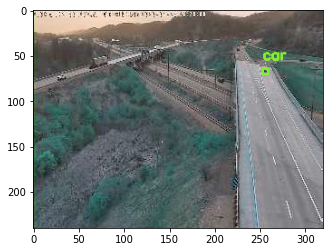

Atherton and Valley Vista  Lat/Lon: ( 40.812073 , -77.9225 )


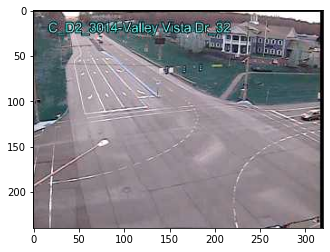

Atherton and Vairo  Lat/Lon: ( 40.807936 , -77.895204 )


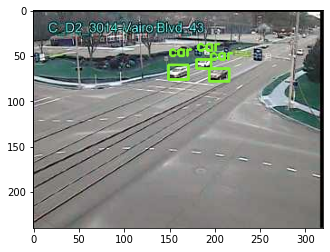

Atherton and North Hills  Lat/Lon: ( 40.805031 , -77.886886 )


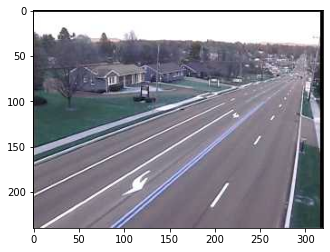

Atherton and Park  Lat/Lon: ( 40.796522 , -77.872549 )


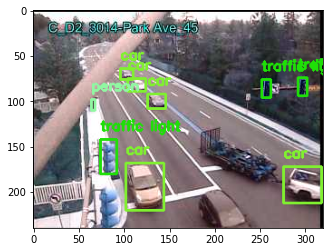

Atherton and W.College  Lat/Lon: ( 40.791787 , -77.864971 )


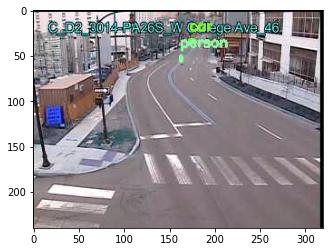

Atherton and W.Beaver  Lat/Lon: ( 40.790894 , -77.863812 )


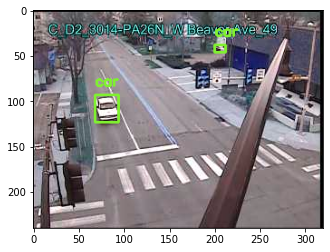

I-99/US-322 Interchange  Lat/Lon: ( 40.828613 , -77.840339 )


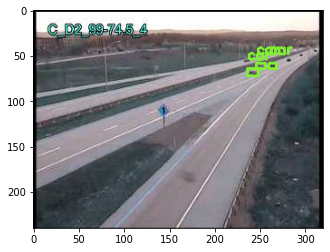

Benner Pike  Lat/Lon: ( 40.829048 , -77.804817 )


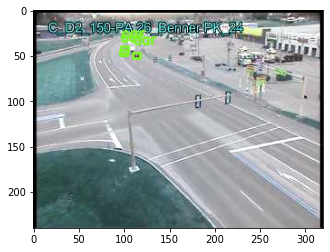

Grays Woods  Lat/Lon: ( 40.817144 , -77.939841 )


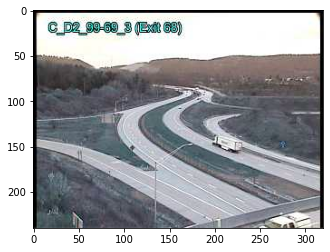

US-322 E/O PA-26  Lat/Lon: ( 40.795773 , -77.820937 )


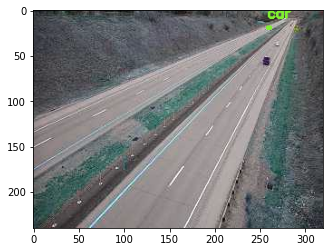

I-99 at Exit 71 (Toftrees)  Lat/Lon: ( 40.817953 , -77.900271 )


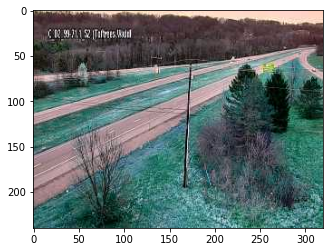

Snowshoe I-80 Exit 147  Lat/Lon: ( 41.022703 , -77.933981 )


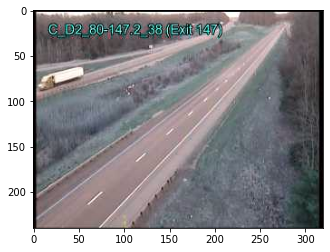

In [35]:
for t in cameras:
    x = glob.glob('/home/ubuntu/traffic/full2/*'+t[0])
    mr = max(x, key=os.path.getctime)
    files = sorted( x, key = lambda file: os.path.getctime(file), reverse=True)
    mr = files[0]
    print(t[1]," Lat/Lon: (",t[2],",",t[3],")")

    if (os.stat(mr).st_size > 9000):
        im = cv2.imread(mr)
    else:
        mr = files[1]
        im = cv2.imread(mr)
        
    bbox, label, conf = cv.detect_common_objects(im)
    output_image = draw_bbox(im, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()